In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as un
from matplotlib.pyplot import cm
from NIST.methods import *

In [3]:
params = {"text.usetex": False, "font.size": 11, "font.family": 'serif', "mathtext.fontset": "dejavuserif"}
plt.rcParams.update(params)

## **Get NIST data**

### Cobalt (Z=27)

- Natural density: 8.9 g/cm^3 
- Powder density: 0.987 g/cm^3

In [7]:
data = np.loadtxt('NIST/co_coeff.txt', usecols=(0, 1))
energy_co = data.transpose()[0]   #MeV
coeff_co  = data.transpose()[1]   #cm²/g
length = np.linspace(2, 20, 10)
rho_co = 0.987 # 8.9 #g/cm^3
#thickness = getThickness(rho_co, length)

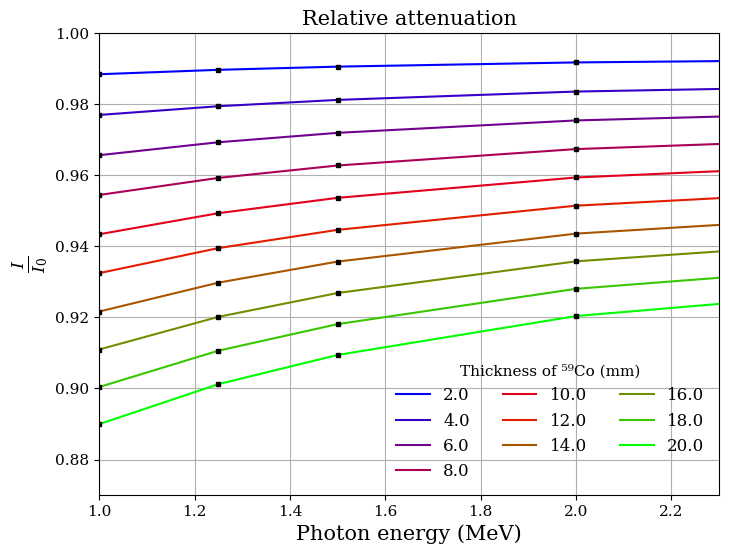

In [12]:
color = cm.brg(np.linspace(0, 1, len(length+10000)))

plt.figure(figsize=(8, 6))

for l, c in zip(length, color):
    att = getRelativeAttenuation(coeff_co, getThickness(rho_co, l))
    plt.plot(energy_co, att, label=str(l), color=c)
    plt.plot(energy_co, att,'ks', ms=3)

plt.legend(title='Thickness of ⁵⁹Co (mm)', loc='lower right', frameon=False, ncol=3, fontsize=12)
plt.xlim(1.0, 2.3)
plt.ylim(0.87, 1)
plt.title('Relative attenuation', fontsize=15)
plt.ylabel(r'$\frac{I}{I_0}$', fontsize=18)
plt.xlabel('Photon energy (MeV)', fontsize=15)
plt.grid(True)

#plt.savefig('Attenuation_Z=27.pdf', dpi=300)

### Get Geant4 data

In [13]:
def attenuationFactor(fep_counts, initial_photons):
    return fep_counts/initial_photons

In [16]:
folder     = 'Geant4/Attenuation_Co_powder_10mm/Event_Histograms/'
energy_sim = [1.0, 2.0]  #MeV
det        = 0
initial_photons = 200000
MeV_to_keV = 1e3

In [18]:
transmission = []
for en in energy_sim:

    data = np.loadtxt(f'{folder}attenuation_{en:.2f}_MeV_sim_0_hist_det{det}.txt', usecols=(0,1))  
    energy = data.transpose()[0]   #MeV
    counts = data.transpose()[1]  
    fep_bin = int(en * MeV_to_keV) 
    fep_counts = data[fep_bin][1]   #+ data[fep_bin-1][1]
    transmission.append(fep_counts)
transmission = np.array(transmission)
relAtt = attenuationFactor(transmission, initial_photons)

In [20]:
for en,att in zip(energy_sim, relAtt):
    print(f'I/I_0 ({en} MeV) = {att}')

I/I_0 (1.0 MeV) = 0.943425
I/I_0 (2.0 MeV) = 0.958815
